In [19]:
import matplotlib.pyplot as plt
import scipy.signal as signal

In [28]:
def indexOfClosest(array, el):
    absolute_difference_function = lambda list_value : abs(list_value - el)
    closest_value = min(array, key=absolute_difference_function)
    return array.index(closest_value)

class Data:
    
    def __init__(self, filename, coeffs):
        self.filename = filename
        self.coeffs = coeffs
        self.dt = 0.06
        self.__convert()
        
    def save(self):
        with open("result.txt", "w") as f:
            for i in range(self.numLines):
                line = []
                for j in range(6):
                    line.append(str(self.result[j][i]))
                line = " ".join(line)
                f.write(line + "\n")
                
    def plot(self, interval=None, filter=True):

        if interval != None:
            start = indexOfClosest(self.result[5], interval[0])
            end = indexOfClosest(self.result[5], interval[1])
        else:
            start = 0
            end = -1
            
        N  = 3    # Filter order
        Wn = 0.1 # Cutoff frequency
        B, A = signal.butter(N, Wn, output='ba')
            
        for i in range(5):
            plt.figure(figsize=(16, 9))
            if filter:
                plt.plot(self.result[5][start:end], signal.filtfilt(B,A, self.result[i][start:end]), linewidth=5)
            else:
                plt.plot(self.result[5][start:end], self.result[i][start:end], linewidth=5)
            plt.title('График {i}'.format(i=i + 1), fontsize=20)
            plt.xlabel("t", fontsize=20)
            plt.ylabel("Значение", fontsize=20)
            plt.grid()
            plt.savefig("graph{i}".format(i=i+1))
            
        plt.figure(figsize=(16, 9))
        for i in range(5):
            if filter:
                plt.plot(self.result[5][start:end], signal.filtfilt(B,A, self.result[i][start:end]), linewidth=5, label="{i} столбец".format(i=i+1), alpha=0.7)
            else:
                plt.plot(self.result[5][start:end], self.result[i][start:end], linewidth=5, label="{i} столбец".format(i=i+1), alpha=0.7)
        plt.title('Совместный график'.format(i=i + 1), fontsize=20)
        plt.legend(fontsize=20)
        plt.xlabel("t", fontsize=20)
        plt.ylabel("Значение", fontsize=20)
        plt.grid()
        plt.savefig("graph".format(i=i+1))

    def __convert(self):
        self.__read()
        result = [[] for i in range(6)]
        for i in range(4):
            result[i] = self.__handleColumn(self.table[i], self.coeffs[i])
        result[4] = self.__prepareFifthColumn(self.table)
        numLines = len(result[0])
        self.numLines = numLines
        result[5] = [self.dt * i for i in range(1, numLines + 1)]
        self.result = result
        
    def __preprocessTable(self, table):
        for column in table:
            head = column[0]
            for i in range(len(column)):
                column[i] = column[i] - head
        return table
        
    def __read(self):
        with open(self.filename, "r") as f:
            table = [[] for i in range(4)]
            for line in f:
                if line != "\n":
                    tmp = line.split(" ")
                    for i in range(4):
                        table[i].append(int(tmp[i]))
            self.table = self.__preprocessTable(table)

    
    def __handleColumn(self, column, coeff):
        tmp = []
        for item in column:
            tmp.append(item * coeff)
        return tmp
    
    def __prepareFifthColumn(self, table):
        numLines = len(table[0])
        tmp = []
        for i in range(numLines):
            line = [
                table[0][i],
                table[1][i],
                table[2][i],
                table[3][i],
            ]
            tmp.append(self.__checkLine(line))
        return tmp
                
    
    def __checkLine(self, line):
        case = [False for i in range(4)]
        nNotNull = 0
        
        for i in range(len(line)):
            if line[i] != 0:
                nNotNull += 1
                case[i] = True
                
        if nNotNull == 0:
            return 0
        
        elif nNotNull == 1:
            return line[case.index(True)]
        
        if nNotNull == 2:
            if case == [True, True, False, False] or case == [False, True, True, False] or case == [False, False, True, True] or case == [True, False, False, True]:
                indices = [i for i in range(4) if case[i] == True]
                i = indices[0]
                j = indices[1]
                return (line[i] ** 2 + line[j] ** 2) ** 0.5

            if case == [True, False, True, False] or case == [False, True, False, True]:
                indices = [i for i in range(4) if case[i] == True]
                i = indices[0]
                j = indices[1]
                maxValue = max(line[i], line[j])
                minValue = min(line[i], line[j])
                return maxValue - minValue
            
        if nNotNull == 3:
            if case == [False, True, True, True]:
                first = max(line[1], line[3]) - min(line[1], line[3])
                second = line[2]
                return (first ** 2 + second ** 2) ** 0.5
            if case == [True, False, True, True]:
                first = max(line[0], line[2]) - min(line[0], line[2])
                second = line[3]
                return (first ** 2 + second ** 2) ** 0.5
            if case == [True, True, False, True]:
                first = max(line[1], line[3]) - min(line[1], line[3])
                second = line[0]
                return (first ** 2 + second ** 2) ** 0.5
            if case == [True, True, True, False]:
                first = max(line[0], line[2]) - min(line[0], line[2])
                second = line[1]
                return (first ** 2 + second ** 2) ** 0.5
        
        if nNotNull == 4:
            first = max(line[0], line[2]) - min(line[0], line[2])
            second = max(line[1], line[3]) - min(line[1], line[3])
            return (first ** 2 + second ** 2) ** 0.5

In [29]:
data = Data("output.txt", [1, 1, 1, 1])

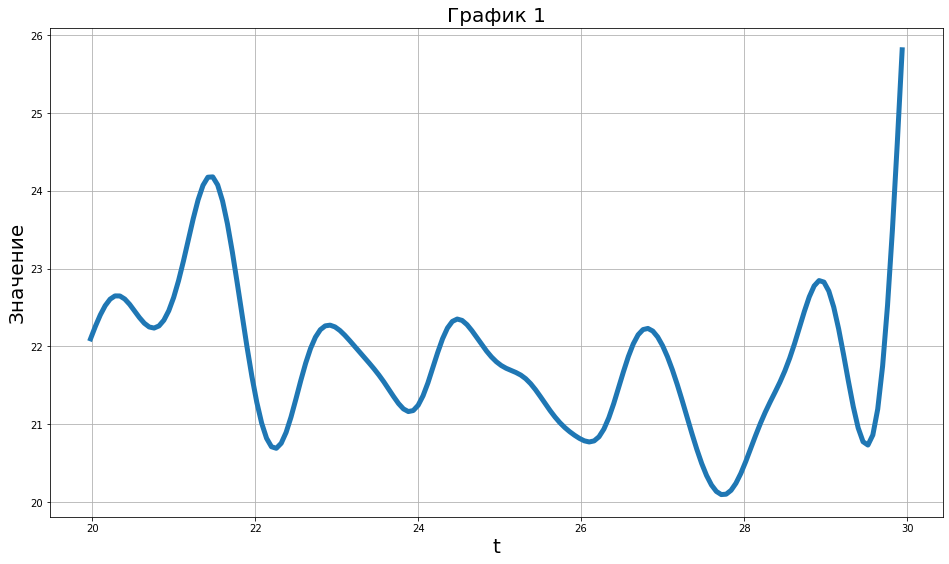

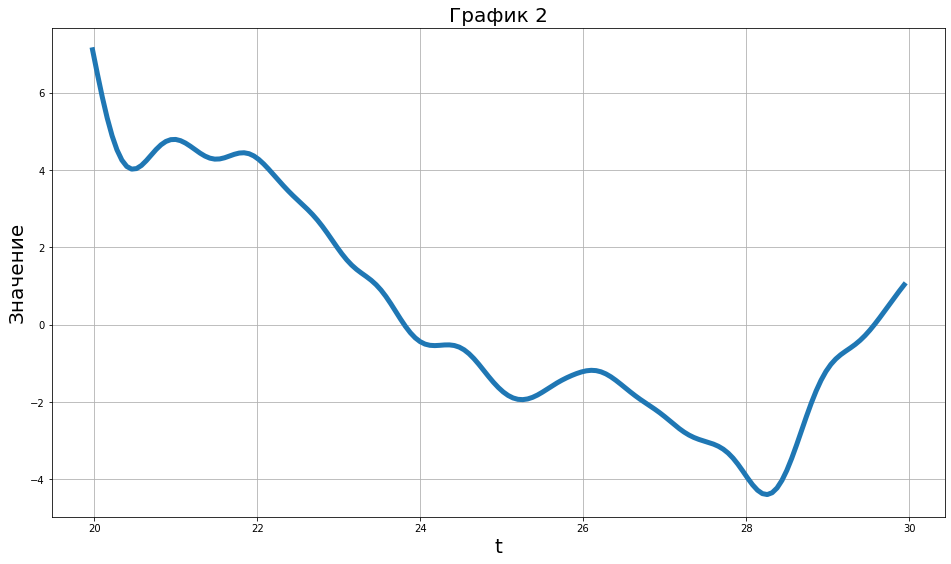

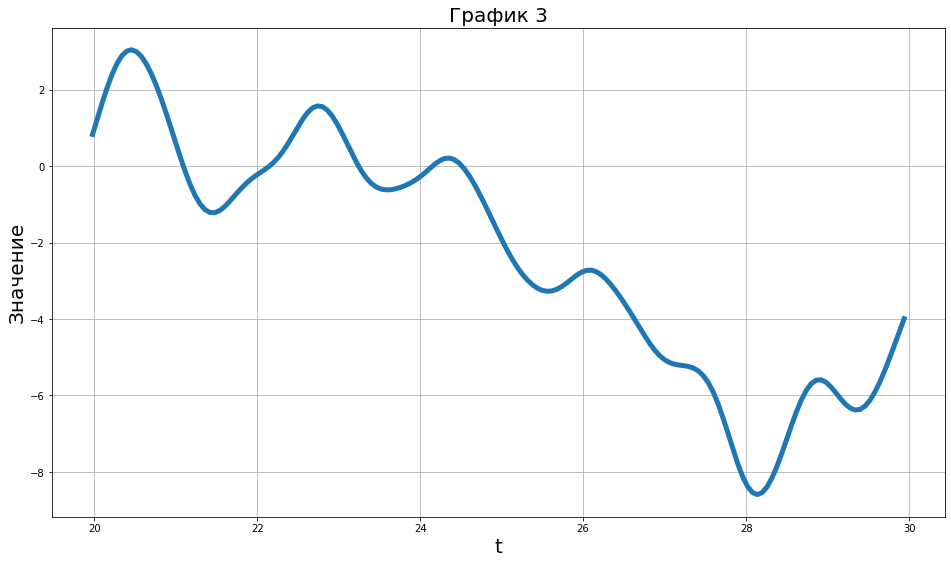

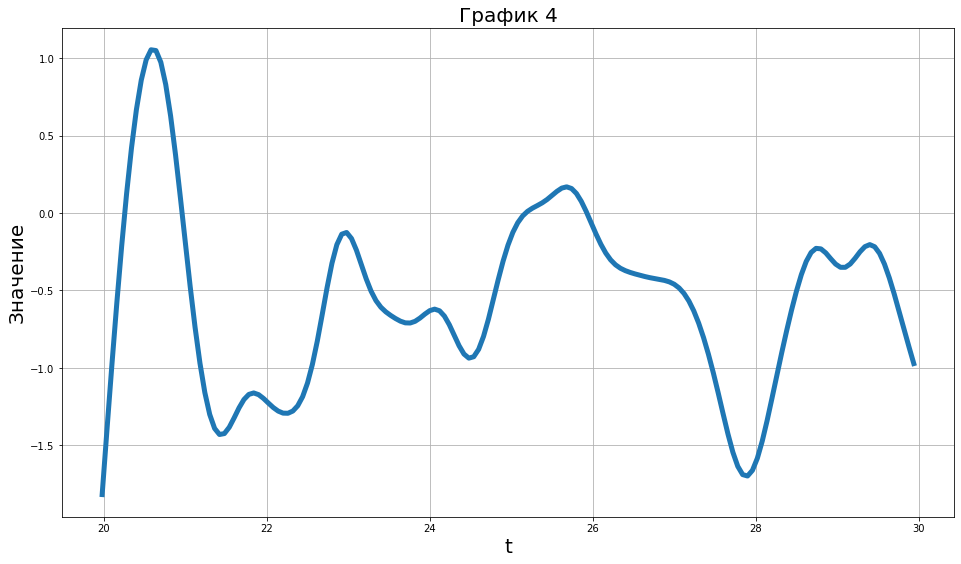

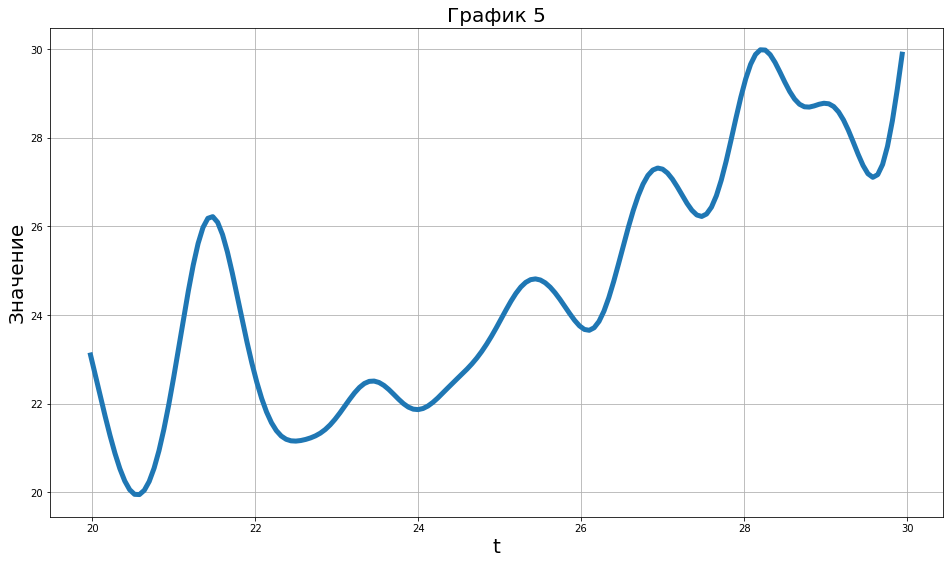

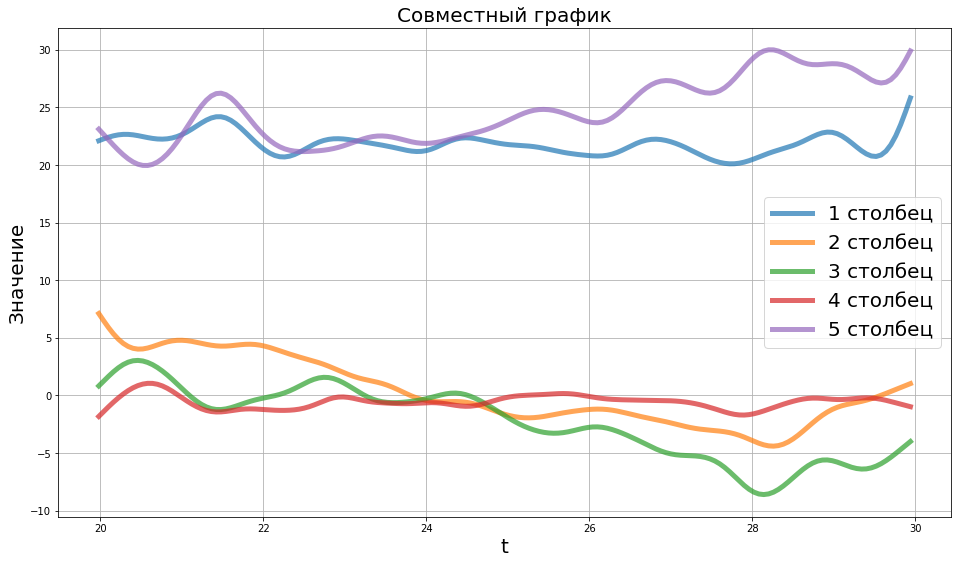

In [30]:
data.save()
data.plot((20, 30))

In [ ]:
data.plot(filter=False)